# JamUNet model trained with the spatial dataset - training and validation

This notebook was used for training and validating the model.

In [1]:
# # move to root directory

# %cd ..

import os

PROJECT_ROOT = "/workspace/jamunet-morpho-braided"
os.chdir(PROJECT_ROOT)

print("Current working directory:", os.getcwd())

Current working directory: /workspace/jamunet-morpho-braided


In [2]:
# reload modules to avoid restarting the notebook every time these are updated

%load_ext autoreload
%autoreload 2

In [3]:
# import modules 

import torch
import joblib
import copy 

from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR

from model.train_eval_copy import * 
from preprocessing.dataset_generation import create_full_dataset
from preprocessing.dataset_generation import combine_datasets
from postprocessing.save_results import *
from postprocessing.plot_results import *

import sys
sys.path.append('model/')
from Lazydata import LazyDataset, build_samples

# enable interactive widgets in Jupyter Notebook
%matplotlib inline
%matplotlib widget

In [4]:
# set the device where operations are performed
# if only one GPU is present you might need to remove the index "0" 
# torch.device('cuda:0') --> torch.device('cuda') / torch.cuda.get_device_name(0) --> torch.cuda.get_device_name() 

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("CUDA Device Count: ", torch.cuda.device_count())
    print("CUDA Device Name: ", torch.cuda.get_device_name(0))
else:
    device = 'cpu'
    
print(f'Using device: {device}')

CUDA Device Count:  1
CUDA Device Name:  NVIDIA A40
Using device: cuda:0


In [5]:
num_cpus = os.cpu_count()  # total logical cores
print("Logical CPU cores:", num_cpus)

Logical CPU cores: 96


In [6]:
# set common keys required for functions

train = 'training'
val = 'validation'
test = 'testing'

In [7]:
print("Current working directory:", os.getcwd())

Current working directory: /workspace/jamunet-morpho-braided


In [8]:
print("Working directory:", os.getcwd())

Working directory: /workspace/jamunet-morpho-braided


**<span style="color:red">Attention!</span>** 
\
Uncomment the next cells if larger training, validation, and testing datasets are needed. These cells load all months datasets (January, February, March, and April) and then merge them into one dataset. 
\
Keep in mind that due to memory constraints, it is likely that not all four datasets can be loaded. 
\
Make sure to load the training, validation, and testing datasets in different cells to reduce memory issues.

In [9]:
# dataset_jan = r'data\satellite\dataset_month1'
# dataset_feb = r'data\satellite\dataset_month2'
# dataset_mar = r'data\satellite\dataset_month3'
# dataset_apr = r'data\satellite\dataset_month4'

# dtype=torch.float32

In [10]:
# inputs_train_jan, targets_train_jan = create_full_dataset(train, dir_folders=dataset_jan, device=device, dtype=dtype).tensors
# inputs_train_feb, targets_train_feb = create_full_dataset(train, dir_folders=dataset_feb, device=device, dtype=dtype).tensors
# inputs_train_mar, targets_train_mar = create_full_dataset(train, dir_folders=dataset_mar, device=device, dtype=dtype).tensors
# inputs_train_apr, targets_train_apr = create_full_dataset(train, dir_folders=dataset_apr, device=device, dtype=dtype).tensors

# inputs_train = torch.cat((inputs_train_jan, inputs_train_feb, inputs_train_mar, inputs_train_apr))
# targets_train = torch.cat((targets_train_jan, targets_train_feb, targets_train_mar, targets_train_apr))
# train_set = TensorDataset(inputs_train, targets_train)

In [11]:
# inputs_val_jan, targets_val_jan = create_full_dataset(val, dir_folders=dataset_jan, device=device, dtype=dtype).tensors
# inputs_val_feb, targets_val_feb = create_full_dataset(val, dir_folders=dataset_feb, device=device, dtype=dtype).tensors
# inputs_val_mar, targets_val_mar = create_full_dataset(val, dir_folders=dataset_mar, device=device, dtype=dtype).tensors
# inputs_val_apr, targets_val_apr = create_full_dataset(val, dir_folders=dataset_apr, device=device, dtype=dtype).tensors

# inputs_val = torch.cat((inputs_val_jan, inputs_val_feb, inputs_val_mar, inputs_val_apr))
# targets_val = torch.cat((targets_val_jan, targets_val_feb, targets_val_mar, targets_val_apr))
# val_set = TensorDataset(inputs_val, targets_val)

In [12]:
# inputs_test_jan, targets_test_jan = create_full_dataset(test, dir_folders=dataset_jan, device=device, dtype=dtype).tensors
# inputs_test_feb, targets_test_feb = create_full_dataset(test, dir_folders=dataset_feb, device=device, dtype=dtype).tensors
# inputs_test_mar, targets_test_mar = create_full_dataset(test, dir_folders=dataset_mar, device=device, dtype=dtype).tensors
# inputs_test_apr, targets_test_apr = create_full_dataset(test, dir_folders=dataset_apr, device=device, dtype=dtype).tensors

# inputs_test = torch.cat((inputs_test_jan, inputs_test_feb, inputs_test_mar, inputs_test_apr))
# targets_test = torch.cat((targets_test_jan, targets_test_feb, targets_test_mar, targets_test_apr))
# test_set = TensorDataset(inputs_test, targets_test)

**<span style="color:red">Attention!</span>** 
\
It is not needed to scale and normalize the dataset as the pixel values are already $[0, 1]$.
\
If scaling and normalization are performed anyways, then **the model inputs have to be changed** as the normalized datasets are used.

In [13]:
# normalize inputs and targets using the training dataset

# scaler_x, scaler_y = scaler(train_set)

# normalized_train_set = normalize_dataset(train_set, scaler_x, scaler_y)
# normalized_val_set = normalize_dataset(val_set, scaler_x, scaler_y)
# normalized_test_set = normalize_dataset(test_set, scaler_x, scaler_y)

In [14]:
# save scalers to be loaded in seperate notebooks (i.e., for testing the model)
# should not change unless seed is changed or augmentation increased (randomsplit changes)

# joblib.dump(scaler_x, r'model\scalers\scaler_x.joblib')
# joblib.dump(scaler_y, r'model\scalers\scaler_y.joblib')

In [15]:
# # load JamUNet architecture

# from model.st_unet.st_unet import *

# # n_channels = train_set[0][0].shape[0]
# n_channels = 48
# n_classes = 2
# init_hid_dim = 8
# kernel_size = 3
# pooling = 'max'

# model = UNet3D(n_channels=n_channels, n_classes=n_classes, init_hid_dim=init_hid_dim, 
#                kernel_size=kernel_size, pooling=pooling, bilinear=False, drop_channels=False)

In [16]:
# print model architecture

# model

In [17]:
# # print total number of parameters and model size

# num_parameters = sum(p.numel() for p in model.parameters())
# print(f"Number of parameters: {num_parameters:.2e}")
# model_size_MB = num_parameters * 4 / (1024 ** 2)  # assuming float32 precision
# print(f"Model size: {model_size_MB:.2f} MB")

**<span style="color:red">Attention!</span>** 
\
Since it is not needed to scale and normalize the dataset (see above), the input for the Data Loader are not the normalized datasets.
\
If normalization is performed, the normalized datasets become the inputs to the model.

In [18]:
# to make it faster
import torch
torch.backends.cudnn.benchmark = True

In [19]:
import copy
import time
import torch
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

from model.st_unet.st_unet_complex import UNet3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def run_training():
    train_samples = build_samples(
        train_val_test="training",
        dir_folders=r"data/satellite/preprocessed_PIETER",
        target_root=r"data/satellite/dataset_month3",
        year_target=5,
        scaled_classes=True,
    )
    train_ds = LazyDataset(train_samples, dtype=torch.float32)

    val_samples = build_samples(
        train_val_test="validation",
        dir_folders=r"data/satellite/preprocessed_PIETER",
        target_root=r"data/satellite/dataset_month3",
        year_target=5,
        scaled_classes=True,
    )
    val_ds = LazyDataset(val_samples, dtype=torch.float32)

    # ----- model -----
    from model.st_unet.st_unet import UNet3D

    n_channels = 1
    n_classes = 2
    init_hid_dim = 8
    kernel_size = 3
    pooling = "max"
    seq_len = 48

    # model = UNet3D(
    #     in_channels=n_channels,
    #     n_classes=n_classes,
    #     base=init_hid_dim,
    #     kernel_size=kernel_size,
    #     pooling=pooling,
    #     bilinear=False,
    #     drop_channels=False,
    #     seq_len=seq_len,
    # ).to(device)
    # model = UNet3D(base=init_hid_dim, n_classes=n_classes).to(device)

    # ----- hyperparameters -----
    learning_rate = 0.05
    batch_size = 8
    accum_steps = 1
    num_epochs = 120
    water_threshold = 0.5
    physics = False
    alpha_er = 1e-4
    alpha_dep = 1e-4

    step_size = 10
    gamma = 0.8

    # ----- dataloaders -----
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=False, persistent_workers=True)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=False, persistent_workers=True)

    batch = next(iter(train_loader))
    x0 = batch[0]              # first item is inputs
    T = x0.shape[2]            # x0: (B,1,T,H,W)
    model = UNet3D(base=init_hid_dim, n_classes=n_classes, T=T).to(device)

    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    # ----- sanity: how big is an epoch? -----
    print(f"train_ds={len(train_ds)}  val_ds={len(val_ds)}")
    print(f"train_batches/epoch={len(train_loader)}  val_batches/epoch={len(val_loader)}")

    # ----- training loop -----
    train_losses, val_losses = [], []
    accuracies, precisions, recalls, f1_scores, csi_scores = [], [], [], [], []
    loss_f = "CE"
    loss_er_dep = "Huber"

    best_loss = float("inf")
    best_recall = -float("inf")
    best_state = None
    best_state_recall = None
    best_epoch_loss = None
    best_epoch_recall = None

    for epoch in range(1, num_epochs + 1):

        # ----- sanity: heartbeat while epoch is running -----
        t0 = time.time()
        last = t0
        def hb(tag):
            nonlocal last
            now = time.time()
            if now - last >= 60:  # print every 60s
                if device.type == "cuda":
                    alloc = torch.cuda.memory_allocated() / 1024**3
                    reserv = torch.cuda.memory_reserved() / 1024**3
                    print(f"[{tag}] +{now-t0:.0f}s")
                else:
                    print(f"[{tag}] +{now-t0:.0f}s")
                last = now

        print(f"\n--- Epoch {epoch} TRAIN ---")
        hb("train")  # immediate marker
        train_loss = training_unet(
            model,
            train_loader,
            optimizer,
            water_threshold=water_threshold,
            device=device,
            loss_f=loss_f,
            physics=physics,
            alpha_er=alpha_er,
            alpha_dep=alpha_dep,
            loss_er_dep=loss_er_dep,
            accum_steps=accum_steps,
            use_amp=False,
        )
        hb("train_done")

        print(f"--- Epoch {epoch} VAL ---")
        hb("val")  # immediate marker
        val_loss, val_accuracy, val_precision, val_recall, val_f1_score, val_csi_score = validation_unet(
            model,
            val_loader,
            device=device,
        )
        hb("val_done")
        
        scheduler.step()

        if val_loss <= best_loss:
            best_loss = val_loss
            best_epoch_loss = epoch
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

        if val_recall >= best_recall:
            best_recall = val_recall
            best_epoch_recall = epoch
            best_state_recall = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        accuracies.append(val_accuracy)
        precisions.append(val_precision)
        recalls.append(val_recall)
        f1_scores.append(val_f1_score)
        csi_scores.append(val_csi_score)

        print(
            f"Epoch: {epoch} | "
            f"Training loss: {train_loss:.2e}, Validation loss: {val_loss:.2e}, Best validation loss: {best_loss:.2e} "
            f"| Metrics: Accuracy: {val_accuracy:.3f}, Precision: {val_precision:.3f}, "
            f"Recall: {val_recall:.3f}, F1-score: {val_f1_score:.3f}, "
            f"CSI-score: {val_csi_score:.3f}, Best recall: {best_recall:.3f}"
        )
        print(f"Current learning rate: {scheduler.get_last_lr()[0]}")

    best_model = None
    if best_state is not None:
        best_model = UNet3D(base=init_hid_dim, n_classes=n_classes, T=T).to(device)
        best_model.load_state_dict(best_state)

    best_model_recall = None
    if best_state_recall is not None:
        best_model_recall = UNet3D(base=init_hid_dim, n_classes=n_classes, T=T).to(device)
        best_model_recall.load_state_dict(best_state_recall)

    return {
        "model": model,
        "best_model": best_model,
        "best_model_recall": best_model_recall,
        "best_epoch_loss": best_epoch_loss,
        "best_epoch_recall": best_epoch_recall,
        "train_losses": train_losses,
        "val_losses": val_losses,
        "accuracies": accuracies,
        "precisions": precisions,
        "recalls": recalls,
        "f1_scores": f1_scores,
        "csi_scores": csi_scores,
    }

In [20]:
if __name__ == "__main__":
    results = run_training()

train_ds=840  val_ds=30
train_batches/epoch=105  val_batches/epoch=4

--- Epoch 1 TRAIN ---


/workspace/jamunet-morpho-braided/model/train_eval_copy.py:60: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=amp_enabled)


/workspace/jamunet-morpho-braided/model/train_eval_copy.py:74: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=amp_enabled):


[train_done] +171s
--- Epoch 1 VAL ---


Epoch: 1 | Training loss: 2.32e-01, Validation loss: 2.04e-01, Best validation loss: 2.04e-01 | Metrics: Accuracy: 0.898, Precision: 0.539, Recall: 0.695, F1-score: 0.606, CSI-score: 0.436, Best recall: 0.695
Current learning rate: 0.05

--- Epoch 2 TRAIN ---


[train_done] +118s
--- Epoch 2 VAL ---


Epoch: 2 | Training loss: 2.02e-01, Validation loss: 2.13e-01, Best validation loss: 2.04e-01 | Metrics: Accuracy: 0.900, Precision: 0.701, Recall: 0.219, F1-score: 0.327, CSI-score: 0.196, Best recall: 0.695
Current learning rate: 0.05

--- Epoch 3 TRAIN ---


[train_done] +122s
--- Epoch 3 VAL ---


Epoch: 3 | Training loss: 1.91e-01, Validation loss: 2.50e-01, Best validation loss: 2.04e-01 | Metrics: Accuracy: 0.879, Precision: 0.478, Recall: 0.845, F1-score: 0.609, CSI-score: 0.438, Best recall: 0.845
Current learning rate: 0.05

--- Epoch 4 TRAIN ---


[train_done] +127s
--- Epoch 4 VAL ---


Epoch: 4 | Training loss: 1.82e-01, Validation loss: 1.89e-01, Best validation loss: 1.89e-01 | Metrics: Accuracy: 0.913, Precision: 0.642, Recall: 0.523, F1-score: 0.575, CSI-score: 0.406, Best recall: 0.845
Current learning rate: 0.05

--- Epoch 5 TRAIN ---


[train_done] +123s
--- Epoch 5 VAL ---


Epoch: 5 | Training loss: 1.80e-01, Validation loss: 1.89e-01, Best validation loss: 1.89e-01 | Metrics: Accuracy: 0.906, Precision: 0.725, Recall: 0.260, F1-score: 0.379, CSI-score: 0.237, Best recall: 0.845
Current learning rate: 0.05

--- Epoch 6 TRAIN ---


[train_done] +122s
--- Epoch 6 VAL ---


Epoch: 6 | Training loss: 1.85e-01, Validation loss: 1.90e-01, Best validation loss: 1.89e-01 | Metrics: Accuracy: 0.913, Precision: 0.624, Recall: 0.572, F1-score: 0.597, CSI-score: 0.427, Best recall: 0.845
Current learning rate: 0.05

--- Epoch 7 TRAIN ---


[train_done] +123s
--- Epoch 7 VAL ---


Epoch: 7 | Training loss: 1.80e-01, Validation loss: 5.39e-01, Best validation loss: 1.89e-01 | Metrics: Accuracy: 0.889, Precision: 0.504, Recall: 0.771, F1-score: 0.608, CSI-score: 0.437, Best recall: 0.845
Current learning rate: 0.05

--- Epoch 8 TRAIN ---


[train_done] +122s
--- Epoch 8 VAL ---


Epoch: 8 | Training loss: 1.77e-01, Validation loss: 1.84e-01, Best validation loss: 1.84e-01 | Metrics: Accuracy: 0.913, Precision: 0.612, Recall: 0.630, F1-score: 0.620, CSI-score: 0.451, Best recall: 0.845
Current learning rate: 0.05

--- Epoch 9 TRAIN ---


[train_done] +125s
--- Epoch 9 VAL ---


Epoch: 9 | Training loss: 1.74e-01, Validation loss: 1.80e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.914, Precision: 0.641, Recall: 0.532, F1-score: 0.579, CSI-score: 0.411, Best recall: 0.845
Current learning rate: 0.05

--- Epoch 10 TRAIN ---


[train_done] +125s
--- Epoch 10 VAL ---


Epoch: 10 | Training loss: 1.74e-01, Validation loss: 1.80e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.915, Precision: 0.651, Recall: 0.531, F1-score: 0.585, CSI-score: 0.416, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 11 TRAIN ---


[train_done] +125s
--- Epoch 11 VAL ---


Epoch: 11 | Training loss: 1.74e-01, Validation loss: 1.99e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.907, Precision: 0.574, Recall: 0.706, F1-score: 0.632, CSI-score: 0.463, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 12 TRAIN ---


[train_done] +128s
--- Epoch 12 VAL ---


Epoch: 12 | Training loss: 1.73e-01, Validation loss: 2.00e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.913, Precision: 0.616, Recall: 0.609, F1-score: 0.612, CSI-score: 0.443, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 13 TRAIN ---


[train_done] +121s
--- Epoch 13 VAL ---


Epoch: 13 | Training loss: 1.73e-01, Validation loss: 1.97e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.915, Precision: 0.652, Recall: 0.530, F1-score: 0.584, CSI-score: 0.414, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 14 TRAIN ---


[train_done] +124s
--- Epoch 14 VAL ---


Epoch: 14 | Training loss: 1.73e-01, Validation loss: 1.90e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.901, Precision: 0.712, Recall: 0.224, F1-score: 0.331, CSI-score: 0.201, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 15 TRAIN ---


[train_done] +120s
--- Epoch 15 VAL ---


Epoch: 15 | Training loss: 1.73e-01, Validation loss: 2.04e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.915, Precision: 0.628, Recall: 0.612, F1-score: 0.620, CSI-score: 0.451, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 16 TRAIN ---


[train_done] +121s
--- Epoch 16 VAL ---


Epoch: 16 | Training loss: 1.71e-01, Validation loss: 1.80e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.915, Precision: 0.617, Recall: 0.639, F1-score: 0.626, CSI-score: 0.458, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 17 TRAIN ---


[train_done] +126s
--- Epoch 17 VAL ---


Epoch: 17 | Training loss: 1.71e-01, Validation loss: 1.84e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.912, Precision: 0.590, Recall: 0.717, F1-score: 0.647, CSI-score: 0.479, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 18 TRAIN ---


[train_done] +137s
--- Epoch 18 VAL ---


Epoch: 18 | Training loss: 1.69e-01, Validation loss: 3.58e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.906, Precision: 0.739, Recall: 0.256, F1-score: 0.379, CSI-score: 0.236, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 19 TRAIN ---


[train_done] +125s
--- Epoch 19 VAL ---


Epoch: 19 | Training loss: 1.70e-01, Validation loss: 1.94e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.916, Precision: 0.635, Recall: 0.602, F1-score: 0.617, CSI-score: 0.449, Best recall: 0.845
Current learning rate: 0.04000000000000001

--- Epoch 20 TRAIN ---


[train_done] +127s
--- Epoch 20 VAL ---


Epoch: 20 | Training loss: 1.68e-01, Validation loss: 1.98e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.916, Precision: 0.641, Recall: 0.592, F1-score: 0.615, CSI-score: 0.446, Best recall: 0.845
Current learning rate: 0.03200000000000001

--- Epoch 21 TRAIN ---


[train_done] +122s
--- Epoch 21 VAL ---


Epoch: 21 | Training loss: 1.70e-01, Validation loss: 2.08e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.911, Precision: 0.686, Recall: 0.392, F1-score: 0.490, CSI-score: 0.332, Best recall: 0.845
Current learning rate: 0.03200000000000001

--- Epoch 22 TRAIN ---


[train_done] +127s
--- Epoch 22 VAL ---


Epoch: 22 | Training loss: 1.69e-01, Validation loss: 1.99e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.915, Precision: 0.616, Recall: 0.664, F1-score: 0.639, CSI-score: 0.471, Best recall: 0.845
Current learning rate: 0.03200000000000001

--- Epoch 23 TRAIN ---


[train_done] +125s
--- Epoch 23 VAL ---


Epoch: 23 | Training loss: 1.67e-01, Validation loss: 1.80e-01, Best validation loss: 1.80e-01 | Metrics: Accuracy: 0.915, Precision: 0.607, Recall: 0.690, F1-score: 0.645, CSI-score: 0.478, Best recall: 0.845
Current learning rate: 0.03200000000000001

--- Epoch 24 TRAIN ---


[train_done] +123s
--- Epoch 24 VAL ---


Epoch: 24 | Training loss: 1.67e-01, Validation loss: 1.71e-01, Best validation loss: 1.71e-01 | Metrics: Accuracy: 0.919, Precision: 0.660, Recall: 0.576, F1-score: 0.614, CSI-score: 0.446, Best recall: 0.845
Current learning rate: 0.03200000000000001

--- Epoch 25 TRAIN ---


[train_done] +128s
--- Epoch 25 VAL ---


Epoch: 25 | Training loss: 1.65e-01, Validation loss: 1.73e-01, Best validation loss: 1.71e-01 | Metrics: Accuracy: 0.918, Precision: 0.632, Recall: 0.656, F1-score: 0.643, CSI-score: 0.475, Best recall: 0.845
Current learning rate: 0.03200000000000001

--- Epoch 26 TRAIN ---


[train_done] +139s
--- Epoch 26 VAL ---


Epoch: 26 | Training loss: 1.66e-01, Validation loss: 3.43e-01, Best validation loss: 1.71e-01 | Metrics: Accuracy: 0.912, Precision: 0.587, Recall: 0.721, F1-score: 0.646, CSI-score: 0.478, Best recall: 0.845
Current learning rate: 0.03200000000000001

--- Epoch 27 TRAIN ---


[train_done] +153s
--- Epoch 27 VAL ---


Epoch: 27 | Training loss: 1.66e-01, Validation loss: 3.10e-01, Best validation loss: 1.71e-01 | Metrics: Accuracy: 0.878, Precision: 0.481, Recall: 0.853, F1-score: 0.614, CSI-score: 0.443, Best recall: 0.853
Current learning rate: 0.03200000000000001

--- Epoch 28 TRAIN ---


[train_done] +147s
--- Epoch 28 VAL ---


Epoch: 28 | Training loss: 1.65e-01, Validation loss: 1.75e-01, Best validation loss: 1.71e-01 | Metrics: Accuracy: 0.918, Precision: 0.678, Recall: 0.523, F1-score: 0.586, CSI-score: 0.420, Best recall: 0.853
Current learning rate: 0.03200000000000001

--- Epoch 29 TRAIN ---


[train_done] +146s
--- Epoch 29 VAL ---


Epoch: 29 | Training loss: 1.66e-01, Validation loss: 3.21e-01, Best validation loss: 1.71e-01 | Metrics: Accuracy: 0.910, Precision: 0.605, Recall: 0.589, F1-score: 0.597, CSI-score: 0.427, Best recall: 0.853
Current learning rate: 0.03200000000000001

--- Epoch 30 TRAIN ---


[train_done] +145s
--- Epoch 30 VAL ---


Epoch: 30 | Training loss: 1.64e-01, Validation loss: 4.57e-01, Best validation loss: 1.71e-01 | Metrics: Accuracy: 0.911, Precision: 0.673, Recall: 0.412, F1-score: 0.510, CSI-score: 0.345, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 31 TRAIN ---


[train_done] +125s
--- Epoch 31 VAL ---


Epoch: 31 | Training loss: 1.69e-01, Validation loss: 1.69e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.920, Precision: 0.694, Recall: 0.515, F1-score: 0.590, CSI-score: 0.422, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 32 TRAIN ---


[train_done] +124s
--- Epoch 32 VAL ---


Epoch: 32 | Training loss: 1.67e-01, Validation loss: 1.88e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.910, Precision: 0.754, Recall: 0.307, F1-score: 0.435, CSI-score: 0.280, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 33 TRAIN ---


[train_done] +124s
--- Epoch 33 VAL ---


Epoch: 33 | Training loss: 1.66e-01, Validation loss: 1.82e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.911, Precision: 0.594, Recall: 0.715, F1-score: 0.647, CSI-score: 0.479, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 34 TRAIN ---


[train_done] +120s
--- Epoch 34 VAL ---


Epoch: 34 | Training loss: 1.64e-01, Validation loss: 1.94e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.909, Precision: 0.777, Recall: 0.275, F1-score: 0.405, CSI-score: 0.256, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 35 TRAIN ---


[train_done] +123s
--- Epoch 35 VAL ---


Epoch: 35 | Training loss: 1.62e-01, Validation loss: 1.75e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.916, Precision: 0.610, Recall: 0.717, F1-score: 0.659, CSI-score: 0.493, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 36 TRAIN ---


[train_done] +124s
--- Epoch 36 VAL ---


Epoch: 36 | Training loss: 1.65e-01, Validation loss: 1.83e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.920, Precision: 0.667, Recall: 0.584, F1-score: 0.623, CSI-score: 0.454, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 37 TRAIN ---


[train_done] +127s
--- Epoch 37 VAL ---


Epoch: 37 | Training loss: 1.63e-01, Validation loss: 1.72e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.920, Precision: 0.644, Recall: 0.651, F1-score: 0.647, CSI-score: 0.480, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 38 TRAIN ---


[train_done] +125s
--- Epoch 38 VAL ---


Epoch: 38 | Training loss: 1.63e-01, Validation loss: 1.79e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.919, Precision: 0.686, Recall: 0.522, F1-score: 0.591, CSI-score: 0.423, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 39 TRAIN ---


[train_done] +125s
--- Epoch 39 VAL ---


Epoch: 39 | Training loss: 1.61e-01, Validation loss: 1.94e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.905, Precision: 0.556, Recall: 0.813, F1-score: 0.660, CSI-score: 0.493, Best recall: 0.853
Current learning rate: 0.025600000000000008

--- Epoch 40 TRAIN ---


[train_done] +122s
--- Epoch 40 VAL ---


Epoch: 40 | Training loss: 1.64e-01, Validation loss: 3.14e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.900, Precision: 0.803, Recall: 0.148, F1-score: 0.247, CSI-score: 0.143, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 41 TRAIN ---


[train_done] +120s
--- Epoch 41 VAL ---


Epoch: 41 | Training loss: 1.63e-01, Validation loss: 1.70e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.920, Precision: 0.634, Recall: 0.688, F1-score: 0.659, CSI-score: 0.493, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 42 TRAIN ---


[train_done] +121s
--- Epoch 42 VAL ---


Epoch: 42 | Training loss: 1.62e-01, Validation loss: 1.80e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.920, Precision: 0.654, Recall: 0.634, F1-score: 0.644, CSI-score: 0.476, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 43 TRAIN ---


[train_done] +119s
--- Epoch 43 VAL ---


Epoch: 43 | Training loss: 1.60e-01, Validation loss: 1.73e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.919, Precision: 0.728, Recall: 0.447, F1-score: 0.552, CSI-score: 0.385, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 44 TRAIN ---


[train_done] +118s
--- Epoch 44 VAL ---


Epoch: 44 | Training loss: 1.61e-01, Validation loss: 1.73e-01, Best validation loss: 1.69e-01 | Metrics: Accuracy: 0.916, Precision: 0.743, Recall: 0.399, F1-score: 0.518, CSI-score: 0.352, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 45 TRAIN ---


[train_done] +124s
--- Epoch 45 VAL ---


Epoch: 45 | Training loss: 1.61e-01, Validation loss: 1.65e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.923, Precision: 0.689, Recall: 0.571, F1-score: 0.623, CSI-score: 0.455, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 46 TRAIN ---


[train_done] +123s
--- Epoch 46 VAL ---


Epoch: 46 | Training loss: 1.61e-01, Validation loss: 2.05e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.908, Precision: 0.574, Recall: 0.752, F1-score: 0.650, CSI-score: 0.482, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 47 TRAIN ---


[train_done] +123s
--- Epoch 47 VAL ---


Epoch: 47 | Training loss: 1.59e-01, Validation loss: 1.93e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.913, Precision: 0.749, Recall: 0.346, F1-score: 0.470, CSI-score: 0.311, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 48 TRAIN ---


[train_done] +125s
--- Epoch 48 VAL ---


Epoch: 48 | Training loss: 1.59e-01, Validation loss: 1.71e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.921, Precision: 0.650, Recall: 0.666, F1-score: 0.658, CSI-score: 0.491, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 49 TRAIN ---


[train_done] +120s
--- Epoch 49 VAL ---


Epoch: 49 | Training loss: 1.59e-01, Validation loss: 2.00e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.902, Precision: 0.542, Recall: 0.841, F1-score: 0.659, CSI-score: 0.491, Best recall: 0.853
Current learning rate: 0.02048000000000001

--- Epoch 50 TRAIN ---


[train_done] +132s
--- Epoch 50 VAL ---


Epoch: 50 | Training loss: 1.59e-01, Validation loss: 1.74e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.917, Precision: 0.607, Recall: 0.751, F1-score: 0.672, CSI-score: 0.507, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 51 TRAIN ---


[train_done] +135s
--- Epoch 51 VAL ---


Epoch: 51 | Training loss: 1.59e-01, Validation loss: 1.75e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.921, Precision: 0.658, Recall: 0.627, F1-score: 0.642, CSI-score: 0.475, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 52 TRAIN ---


[train_done] +134s
--- Epoch 52 VAL ---


Epoch: 52 | Training loss: 1.58e-01, Validation loss: 1.68e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.920, Precision: 0.718, Recall: 0.485, F1-score: 0.577, CSI-score: 0.409, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 53 TRAIN ---


[train_done] +149s
--- Epoch 53 VAL ---


Epoch: 53 | Training loss: 1.58e-01, Validation loss: 1.65e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.923, Precision: 0.678, Recall: 0.606, F1-score: 0.640, CSI-score: 0.472, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 54 TRAIN ---


[train_done] +156s
--- Epoch 54 VAL ---


Epoch: 54 | Training loss: 1.64e-01, Validation loss: 2.18e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.910, Precision: 0.597, Recall: 0.622, F1-score: 0.609, CSI-score: 0.438, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 55 TRAIN ---


[train_done] +161s
--- Epoch 55 VAL ---


Epoch: 55 | Training loss: 1.65e-01, Validation loss: 1.86e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.918, Precision: 0.624, Recall: 0.702, F1-score: 0.660, CSI-score: 0.494, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 56 TRAIN ---


[train_done] +150s
--- Epoch 56 VAL ---


Epoch: 56 | Training loss: 1.59e-01, Validation loss: 1.65e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.922, Precision: 0.704, Recall: 0.527, F1-score: 0.601, CSI-score: 0.433, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 57 TRAIN ---


[train_done] +122s
--- Epoch 57 VAL ---


Epoch: 57 | Training loss: 1.59e-01, Validation loss: 1.70e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.923, Precision: 0.698, Recall: 0.559, F1-score: 0.620, CSI-score: 0.452, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 58 TRAIN ---


[train_done] +147s
--- Epoch 58 VAL ---


Epoch: 58 | Training loss: 1.58e-01, Validation loss: 1.68e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.920, Precision: 0.634, Recall: 0.696, F1-score: 0.663, CSI-score: 0.498, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 59 TRAIN ---


[train_done] +128s
--- Epoch 59 VAL ---


Epoch: 59 | Training loss: 1.57e-01, Validation loss: 1.67e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.923, Precision: 0.673, Recall: 0.617, F1-score: 0.644, CSI-score: 0.477, Best recall: 0.853
Current learning rate: 0.016384000000000006

--- Epoch 60 TRAIN ---


[train_done] +124s
--- Epoch 60 VAL ---


Epoch: 60 | Training loss: 1.57e-01, Validation loss: 2.27e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.912, Precision: 0.598, Recall: 0.707, F1-score: 0.647, CSI-score: 0.479, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 61 TRAIN ---


[train_done] +119s
--- Epoch 61 VAL ---


Epoch: 61 | Training loss: 1.57e-01, Validation loss: 1.65e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.923, Precision: 0.659, Recall: 0.658, F1-score: 0.658, CSI-score: 0.492, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 62 TRAIN ---


[train_done] +119s
--- Epoch 62 VAL ---


Epoch: 62 | Training loss: 1.57e-01, Validation loss: 1.68e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.920, Precision: 0.638, Recall: 0.668, F1-score: 0.652, CSI-score: 0.486, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 63 TRAIN ---


[train_done] +136s
--- Epoch 63 VAL ---


Epoch: 63 | Training loss: 1.57e-01, Validation loss: 1.66e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.921, Precision: 0.653, Recall: 0.645, F1-score: 0.649, CSI-score: 0.482, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 64 TRAIN ---


[train_done] +123s
--- Epoch 64 VAL ---


Epoch: 64 | Training loss: 1.57e-01, Validation loss: 2.01e-01, Best validation loss: 1.65e-01 | Metrics: Accuracy: 0.921, Precision: 0.681, Recall: 0.573, F1-score: 0.622, CSI-score: 0.454, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 65 TRAIN ---


[train_done] +121s
--- Epoch 65 VAL ---


Epoch: 65 | Training loss: 1.56e-01, Validation loss: 1.64e-01, Best validation loss: 1.64e-01 | Metrics: Accuracy: 0.922, Precision: 0.652, Recall: 0.673, F1-score: 0.662, CSI-score: 0.496, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 66 TRAIN ---


[train_done] +121s
--- Epoch 66 VAL ---


Epoch: 66 | Training loss: 1.56e-01, Validation loss: 1.63e-01, Best validation loss: 1.63e-01 | Metrics: Accuracy: 0.923, Precision: 0.664, Recall: 0.636, F1-score: 0.649, CSI-score: 0.482, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 67 TRAIN ---


[train_done] +125s
--- Epoch 67 VAL ---


Epoch: 67 | Training loss: 1.57e-01, Validation loss: 1.76e-01, Best validation loss: 1.63e-01 | Metrics: Accuracy: 0.917, Precision: 0.612, Recall: 0.742, F1-score: 0.670, CSI-score: 0.505, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 68 TRAIN ---


[train_done] +122s
--- Epoch 68 VAL ---


Epoch: 68 | Training loss: 1.56e-01, Validation loss: 1.62e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.924, Precision: 0.689, Recall: 0.589, F1-score: 0.635, CSI-score: 0.467, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 69 TRAIN ---


[train_done] +129s
--- Epoch 69 VAL ---


Epoch: 69 | Training loss: 1.58e-01, Validation loss: 1.63e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.924, Precision: 0.711, Recall: 0.546, F1-score: 0.617, CSI-score: 0.448, Best recall: 0.853
Current learning rate: 0.013107200000000006

--- Epoch 70 TRAIN ---


[train_done] +128s
--- Epoch 70 VAL ---


Epoch: 70 | Training loss: 1.56e-01, Validation loss: 1.69e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.921, Precision: 0.684, Recall: 0.567, F1-score: 0.620, CSI-score: 0.451, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 71 TRAIN ---


[train_done] +119s
--- Epoch 71 VAL ---


Epoch: 71 | Training loss: 1.55e-01, Validation loss: 1.64e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.924, Precision: 0.677, Recall: 0.621, F1-score: 0.646, CSI-score: 0.480, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 72 TRAIN ---


[train_done] +143s
--- Epoch 72 VAL ---


Epoch: 72 | Training loss: 1.55e-01, Validation loss: 1.65e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.922, Precision: 0.716, Recall: 0.516, F1-score: 0.599, CSI-score: 0.431, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 73 TRAIN ---


[train_done] +133s
--- Epoch 73 VAL ---


Epoch: 73 | Training loss: 1.55e-01, Validation loss: 1.96e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.900, Precision: 0.553, Recall: 0.780, F1-score: 0.644, CSI-score: 0.476, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 74 TRAIN ---


[train_done] +123s
--- Epoch 74 VAL ---


Epoch: 74 | Training loss: 1.56e-01, Validation loss: 1.64e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.922, Precision: 0.660, Recall: 0.644, F1-score: 0.652, CSI-score: 0.486, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 75 TRAIN ---


[train_done] +144s
--- Epoch 75 VAL ---


Epoch: 75 | Training loss: 1.57e-01, Validation loss: 1.67e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.921, Precision: 0.649, Recall: 0.676, F1-score: 0.662, CSI-score: 0.495, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 76 TRAIN ---


[train_done] +144s
--- Epoch 76 VAL ---


Epoch: 76 | Training loss: 1.56e-01, Validation loss: 1.64e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.682, Recall: 0.595, F1-score: 0.635, CSI-score: 0.468, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 77 TRAIN ---


[train_done] +130s
--- Epoch 77 VAL ---


Epoch: 77 | Training loss: 1.56e-01, Validation loss: 1.63e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.672, Recall: 0.623, F1-score: 0.646, CSI-score: 0.479, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 78 TRAIN ---


[train_done] +123s
--- Epoch 78 VAL ---


Epoch: 78 | Training loss: 1.55e-01, Validation loss: 1.68e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.659, Recall: 0.664, F1-score: 0.661, CSI-score: 0.495, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 79 TRAIN ---


[train_done] +122s
--- Epoch 79 VAL ---


Epoch: 79 | Training loss: 1.54e-01, Validation loss: 1.62e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.670, Recall: 0.629, F1-score: 0.649, CSI-score: 0.482, Best recall: 0.853
Current learning rate: 0.010485760000000005

--- Epoch 80 TRAIN ---


[train_done] +126s
--- Epoch 80 VAL ---


Epoch: 80 | Training loss: 1.54e-01, Validation loss: 1.65e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.676, Recall: 0.611, F1-score: 0.641, CSI-score: 0.475, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 81 TRAIN ---


[train_done] +129s
--- Epoch 81 VAL ---


Epoch: 81 | Training loss: 1.54e-01, Validation loss: 1.64e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.668, Recall: 0.640, F1-score: 0.654, CSI-score: 0.487, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 82 TRAIN ---


[train_done] +126s
--- Epoch 82 VAL ---


Epoch: 82 | Training loss: 1.54e-01, Validation loss: 1.66e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.674, Recall: 0.608, F1-score: 0.639, CSI-score: 0.472, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 83 TRAIN ---


[train_done] +121s
--- Epoch 83 VAL ---


Epoch: 83 | Training loss: 1.53e-01, Validation loss: 1.63e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.924, Precision: 0.685, Recall: 0.600, F1-score: 0.639, CSI-score: 0.472, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 84 TRAIN ---


[train_done] +120s
--- Epoch 84 VAL ---


Epoch: 84 | Training loss: 1.54e-01, Validation loss: 1.65e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.673, Recall: 0.616, F1-score: 0.643, CSI-score: 0.476, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 85 TRAIN ---


[train_done] +123s
--- Epoch 85 VAL ---


Epoch: 85 | Training loss: 1.53e-01, Validation loss: 1.62e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.924, Precision: 0.685, Recall: 0.600, F1-score: 0.639, CSI-score: 0.472, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 86 TRAIN ---


[train_done] +122s
--- Epoch 86 VAL ---


Epoch: 86 | Training loss: 1.53e-01, Validation loss: 1.69e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.920, Precision: 0.635, Recall: 0.689, F1-score: 0.660, CSI-score: 0.494, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 87 TRAIN ---


[train_done] +122s
--- Epoch 87 VAL ---


Epoch: 87 | Training loss: 1.53e-01, Validation loss: 1.65e-01, Best validation loss: 1.62e-01 | Metrics: Accuracy: 0.923, Precision: 0.687, Recall: 0.592, F1-score: 0.636, CSI-score: 0.468, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 88 TRAIN ---


[train_done] +127s
--- Epoch 88 VAL ---


Epoch: 88 | Training loss: 1.54e-01, Validation loss: 1.61e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.924, Precision: 0.678, Recall: 0.618, F1-score: 0.646, CSI-score: 0.479, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 89 TRAIN ---


[train_done] +126s
--- Epoch 89 VAL ---


Epoch: 89 | Training loss: 1.52e-01, Validation loss: 1.61e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.924, Precision: 0.697, Recall: 0.582, F1-score: 0.634, CSI-score: 0.466, Best recall: 0.853
Current learning rate: 0.008388608000000004

--- Epoch 90 TRAIN ---


[train_done] +125s
--- Epoch 90 VAL ---


Epoch: 90 | Training loss: 1.53e-01, Validation loss: 1.63e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.693, Recall: 0.574, F1-score: 0.628, CSI-score: 0.460, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 91 TRAIN ---


[train_done] +131s
--- Epoch 91 VAL ---


Epoch: 91 | Training loss: 1.52e-01, Validation loss: 1.62e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.924, Precision: 0.674, Recall: 0.634, F1-score: 0.653, CSI-score: 0.486, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 92 TRAIN ---


[train_done] +137s
--- Epoch 92 VAL ---


Epoch: 92 | Training loss: 1.52e-01, Validation loss: 1.63e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.677, Recall: 0.605, F1-score: 0.639, CSI-score: 0.472, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 93 TRAIN ---


[train_done] +140s
--- Epoch 93 VAL ---


Epoch: 93 | Training loss: 1.52e-01, Validation loss: 1.62e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.924, Precision: 0.698, Recall: 0.577, F1-score: 0.632, CSI-score: 0.463, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 94 TRAIN ---


[train_done] +124s
--- Epoch 94 VAL ---


Epoch: 94 | Training loss: 1.52e-01, Validation loss: 1.63e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.924, Precision: 0.674, Recall: 0.629, F1-score: 0.650, CSI-score: 0.484, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 95 TRAIN ---


[train_done] +135s
--- Epoch 95 VAL ---


Epoch: 95 | Training loss: 1.51e-01, Validation loss: 1.64e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.664, Recall: 0.648, F1-score: 0.656, CSI-score: 0.489, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 96 TRAIN ---


[train_done] +125s
--- Epoch 96 VAL ---


Epoch: 96 | Training loss: 1.52e-01, Validation loss: 1.61e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.680, Recall: 0.610, F1-score: 0.643, CSI-score: 0.476, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 97 TRAIN ---


[train_done] +131s
--- Epoch 97 VAL ---


Epoch: 97 | Training loss: 1.52e-01, Validation loss: 1.63e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.656, Recall: 0.662, F1-score: 0.658, CSI-score: 0.493, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 98 TRAIN ---


[train_done] +141s
--- Epoch 98 VAL ---


Epoch: 98 | Training loss: 1.52e-01, Validation loss: 1.62e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.707, Recall: 0.550, F1-score: 0.619, CSI-score: 0.450, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 99 TRAIN ---


[train_done] +136s
--- Epoch 99 VAL ---


Epoch: 99 | Training loss: 1.51e-01, Validation loss: 1.64e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.673, Recall: 0.625, F1-score: 0.648, CSI-score: 0.480, Best recall: 0.853
Current learning rate: 0.006710886400000004

--- Epoch 100 TRAIN ---


[train_done] +127s
--- Epoch 100 VAL ---


Epoch: 100 | Training loss: 1.52e-01, Validation loss: 1.73e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.919, Precision: 0.618, Recall: 0.734, F1-score: 0.671, CSI-score: 0.506, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 101 TRAIN ---


[train_done] +134s
--- Epoch 101 VAL ---


Epoch: 101 | Training loss: 1.52e-01, Validation loss: 1.65e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.924, Precision: 0.690, Recall: 0.590, F1-score: 0.636, CSI-score: 0.468, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 102 TRAIN ---


[train_done] +135s
--- Epoch 102 VAL ---


Epoch: 102 | Training loss: 1.51e-01, Validation loss: 1.62e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.924, Precision: 0.678, Recall: 0.617, F1-score: 0.645, CSI-score: 0.479, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 103 TRAIN ---


[train_done] +139s
--- Epoch 103 VAL ---


Epoch: 103 | Training loss: 1.51e-01, Validation loss: 1.84e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.918, Precision: 0.631, Recall: 0.680, F1-score: 0.653, CSI-score: 0.486, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 104 TRAIN ---


[train_done] +119s
--- Epoch 104 VAL ---


Epoch: 104 | Training loss: 1.51e-01, Validation loss: 1.67e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.920, Precision: 0.629, Recall: 0.717, F1-score: 0.670, CSI-score: 0.505, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 105 TRAIN ---


[train_done] +118s
--- Epoch 105 VAL ---


Epoch: 105 | Training loss: 1.51e-01, Validation loss: 1.63e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.677, Recall: 0.613, F1-score: 0.643, CSI-score: 0.476, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 106 TRAIN ---


[train_done] +123s
--- Epoch 106 VAL ---


Epoch: 106 | Training loss: 1.50e-01, Validation loss: 1.64e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.682, Recall: 0.592, F1-score: 0.634, CSI-score: 0.466, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 107 TRAIN ---


[train_done] +140s
--- Epoch 107 VAL ---


Epoch: 107 | Training loss: 1.51e-01, Validation loss: 1.71e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.920, Precision: 0.716, Recall: 0.488, F1-score: 0.579, CSI-score: 0.410, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 108 TRAIN ---


[train_done] +119s
--- Epoch 108 VAL ---


Epoch: 108 | Training loss: 1.50e-01, Validation loss: 1.63e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.681, Recall: 0.609, F1-score: 0.643, CSI-score: 0.475, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 109 TRAIN ---


[train_done] +132s
--- Epoch 109 VAL ---


Epoch: 109 | Training loss: 1.50e-01, Validation loss: 1.67e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.922, Precision: 0.701, Recall: 0.543, F1-score: 0.612, CSI-score: 0.444, Best recall: 0.853
Current learning rate: 0.005368709120000003

--- Epoch 110 TRAIN ---


[train_done] +149s
--- Epoch 110 VAL ---


Epoch: 110 | Training loss: 1.52e-01, Validation loss: 1.65e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.922, Precision: 0.720, Recall: 0.505, F1-score: 0.594, CSI-score: 0.424, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 111 TRAIN ---


[train_done] +134s
--- Epoch 111 VAL ---


Epoch: 111 | Training loss: 1.50e-01, Validation loss: 1.62e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.669, Recall: 0.630, F1-score: 0.649, CSI-score: 0.482, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 112 TRAIN ---


[train_done] +125s
--- Epoch 112 VAL ---


Epoch: 112 | Training loss: 1.50e-01, Validation loss: 1.65e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.689, Recall: 0.584, F1-score: 0.632, CSI-score: 0.464, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 113 TRAIN ---


[train_done] +144s
--- Epoch 113 VAL ---


Epoch: 113 | Training loss: 1.50e-01, Validation loss: 1.65e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.669, Recall: 0.635, F1-score: 0.651, CSI-score: 0.484, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 114 TRAIN ---


[train_done] +133s
--- Epoch 114 VAL ---


Epoch: 114 | Training loss: 1.49e-01, Validation loss: 1.64e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.687, Recall: 0.587, F1-score: 0.633, CSI-score: 0.465, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 115 TRAIN ---


[train_done] +130s
--- Epoch 115 VAL ---


Epoch: 115 | Training loss: 1.50e-01, Validation loss: 1.65e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.922, Precision: 0.695, Recall: 0.550, F1-score: 0.613, CSI-score: 0.445, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 116 TRAIN ---


[train_done] +131s
--- Epoch 116 VAL ---


Epoch: 116 | Training loss: 1.52e-01, Validation loss: 1.66e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.922, Precision: 0.693, Recall: 0.558, F1-score: 0.617, CSI-score: 0.449, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 117 TRAIN ---


[train_done] +142s
--- Epoch 117 VAL ---


Epoch: 117 | Training loss: 1.50e-01, Validation loss: 1.63e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.683, Recall: 0.599, F1-score: 0.638, CSI-score: 0.471, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 118 TRAIN ---


[train_done] +134s
--- Epoch 118 VAL ---


Epoch: 118 | Training loss: 1.50e-01, Validation loss: 1.64e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.923, Precision: 0.673, Recall: 0.616, F1-score: 0.642, CSI-score: 0.475, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 119 TRAIN ---


[train_done] +153s
--- Epoch 119 VAL ---


Epoch: 119 | Training loss: 1.50e-01, Validation loss: 1.64e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.922, Precision: 0.647, Recall: 0.680, F1-score: 0.663, CSI-score: 0.497, Best recall: 0.853
Current learning rate: 0.0042949672960000025

--- Epoch 120 TRAIN ---


[train_done] +149s
--- Epoch 120 VAL ---


Epoch: 120 | Training loss: 1.49e-01, Validation loss: 1.65e-01, Best validation loss: 1.61e-01 | Metrics: Accuracy: 0.922, Precision: 0.667, Recall: 0.627, F1-score: 0.646, CSI-score: 0.479, Best recall: 0.853
Current learning rate: 0.0034359738368000023


In [21]:
model = results["model"]
best_model = results["best_model"]
best_model_recall = results["best_model_recall"]
train_losses = results["train_losses"]
val_losses = results["val_losses"]
accuracies = results["accuracies"]
precisions = results["precisions"]
recalls = results["recalls"]
f1_scores = results["f1_scores"]
csi_scores = results["csi_scores"]

In [22]:
test_samples = build_samples(
    train_val_test="testing",
    dir_folders=r"data/satellite/preprocessed_PIETER",
    target_root=r"data/satellite/dataset_month3",
    year_target=5,
    scaled_classes=True,
)

test_ds = LazyDataset(test_samples, dtype=torch.float32)

test_loader = DataLoader(
    test_ds,
    batch_size=1,
    shuffle=False,
    num_workers=2,
    pin_memory=False,
    persistent_workers=True,
)

In [23]:
metrics = [accuracies, precisions, recalls, f1_scores, csi_scores]

loss_f = "BCE"

In [24]:
# store training and validation losses and metrics to be stored in a .csv file for later postprocessing
# always check the dataset month key

save_losses_metrics(train_losses, val_losses, metrics, 'spatial', model, 3, dir_output=r'model\losses_metrics')

model\losses_metrics/UNet3Dspatial_month3_baseNone_TNone_lrNoneNonebatch_Noneepochs_Nonewthr.csv


**<span style="color:red">Attention!</span>** 
\
Always remember to rename the <code>save_path</code> file before running the whole notebook to avoid overwrting it.

In [25]:
save_model_path(
    model=best_model,
    spatial_temporal='spatial',
    loss_recall="minloss",
)

save_model_path(
    model=best_model_recall,
    spatial_temporal='spatial',
    loss_recall="maxrecall",
)

model\models_trained/UNet3DminlossspatialmonthNone_baseNone_TNone_lrNoneNonebatch_Noneepochs_Nonewthr.pth
model\models_trained/UNet3DmaxrecallspatialmonthNone_baseNone_TNone_lrNoneNonebatch_Noneepochs_Nonewthr.pth


In [26]:
# test the min loss model - average loss and metrics

model_loss = copy.deepcopy(best_model)
test_loss, test_accuracy, test_precision, test_recall, test_f1_score, test_csi_score = validation_unet(model_loss, test_loader, device=device)

print(f'Average metrics for test dataset using model with best validation loss:\n\n\
{loss_f} loss:          {test_loss:.3e}\n\
Accuracy:          {test_accuracy:.3f}\n\
Precision:         {test_precision:.3f}\n\
Recall:            {test_recall:.3f}\n\
F1 score:          {test_f1_score:.3f}\n\
CSI score:         {test_csi_score:.3f}')

Average metrics for test dataset using model with best validation loss:

BCE loss:          1.543e-01
Accuracy:          0.927
Precision:         0.710
Recall:            0.668
F1 score:          0.685
CSI score:         0.525


In [27]:
# test the max recall model - average loss and metrics

model_recall = copy.deepcopy(best_model_recall)
test_loss, test_accuracy, test_precision, test_recall, test_f1_score, test_csi_score = validation_unet(model_recall, test_loader, device=device)

print(f'Average metrics for test dataset using model with best validation recall:\n\n\
{loss_f} loss:          {test_loss:.3e}\n\
Accuracy:          {test_accuracy:.3f}\n\
Precision:         {test_precision:.3f}\n\
Recall:            {test_recall:.3f}\n\
F1 score:          {test_f1_score:.3f}\n\
CSI score:         {test_csi_score:.3f}')

Average metrics for test dataset using model with best validation recall:

BCE loss:          3.246e-01
Accuracy:          0.869
Precision:         0.525
Recall:            0.891
F1 score:          0.653
CSI score:         0.490


In [28]:
print(train_losses)

[0.2321763203257606, 0.20191622646082016, 0.19059221815495264, 0.18222908427317938, 0.1803789680912381, 0.184744084023294, 0.18027125327360063, 0.1770937103600729, 0.17432264501140232, 0.17357491552829743, 0.17381563115687598, 0.1732571637346631, 0.17277047151610964, 0.17344864833922613, 0.17291447534447624, 0.17060833530766623, 0.17121302499657587, 0.1690995556967599, 0.17013784902436394, 0.16799644849130085, 0.1697128176689148, 0.16908361507313593, 0.16711864812033517, 0.1670320594594592, 0.16536588824930645, 0.1661447774796259, 0.16590822559027446, 0.16537959894963672, 0.16608884313276837, 0.16387849435919807, 0.16883412755671, 0.16686868483111972, 0.1659248024225235, 0.16391708013557252, 0.1621984110701652, 0.1653326668909618, 0.1626009069737934, 0.16276888485465732, 0.16088296153715678, 0.1635842245249521, 0.1625852739527112, 0.16215361647662663, 0.1602344259619713, 0.1609558444647562, 0.16084151729231788, 0.16087548640512284, 0.1586565211415291, 0.15869423370985758, 0.15939248629

In [29]:
%matplotlib inline

ATTENTION: the argument `save_name` is not specified: the plot is not saved.


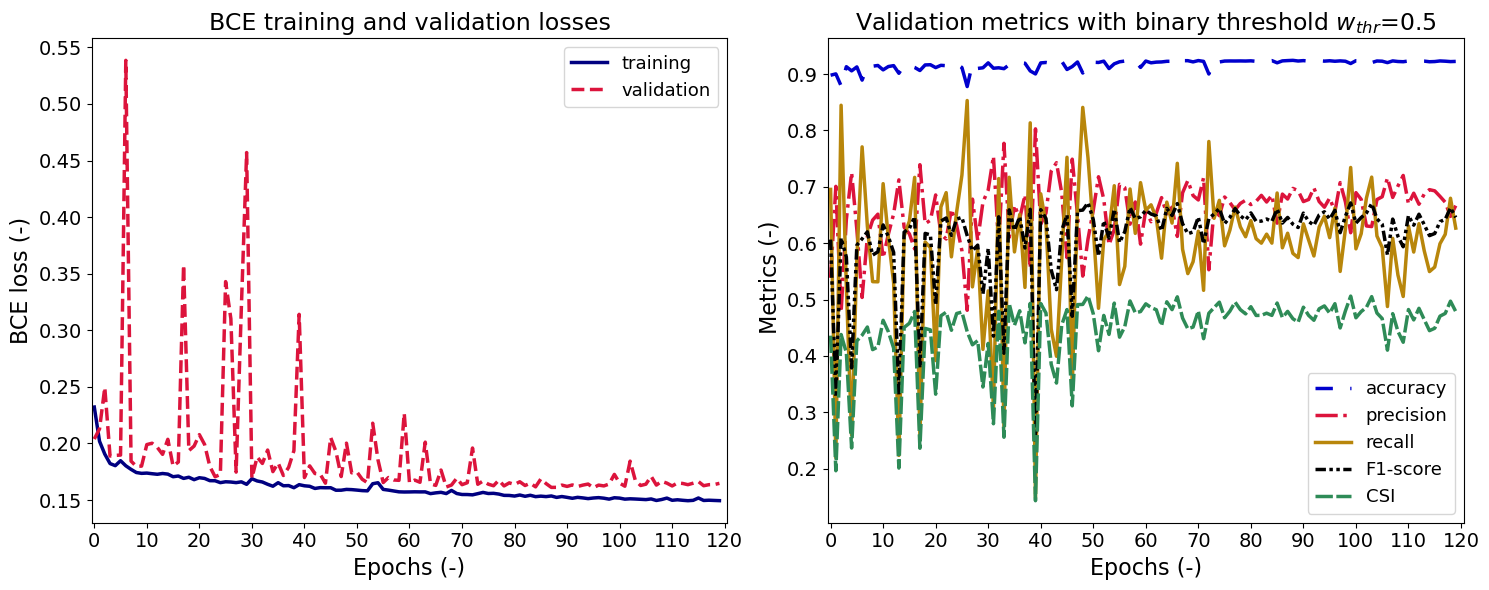

In [30]:
plot_losses_metrics(train_losses, val_losses, metrics, best_model_recall, loss_f=loss_f)

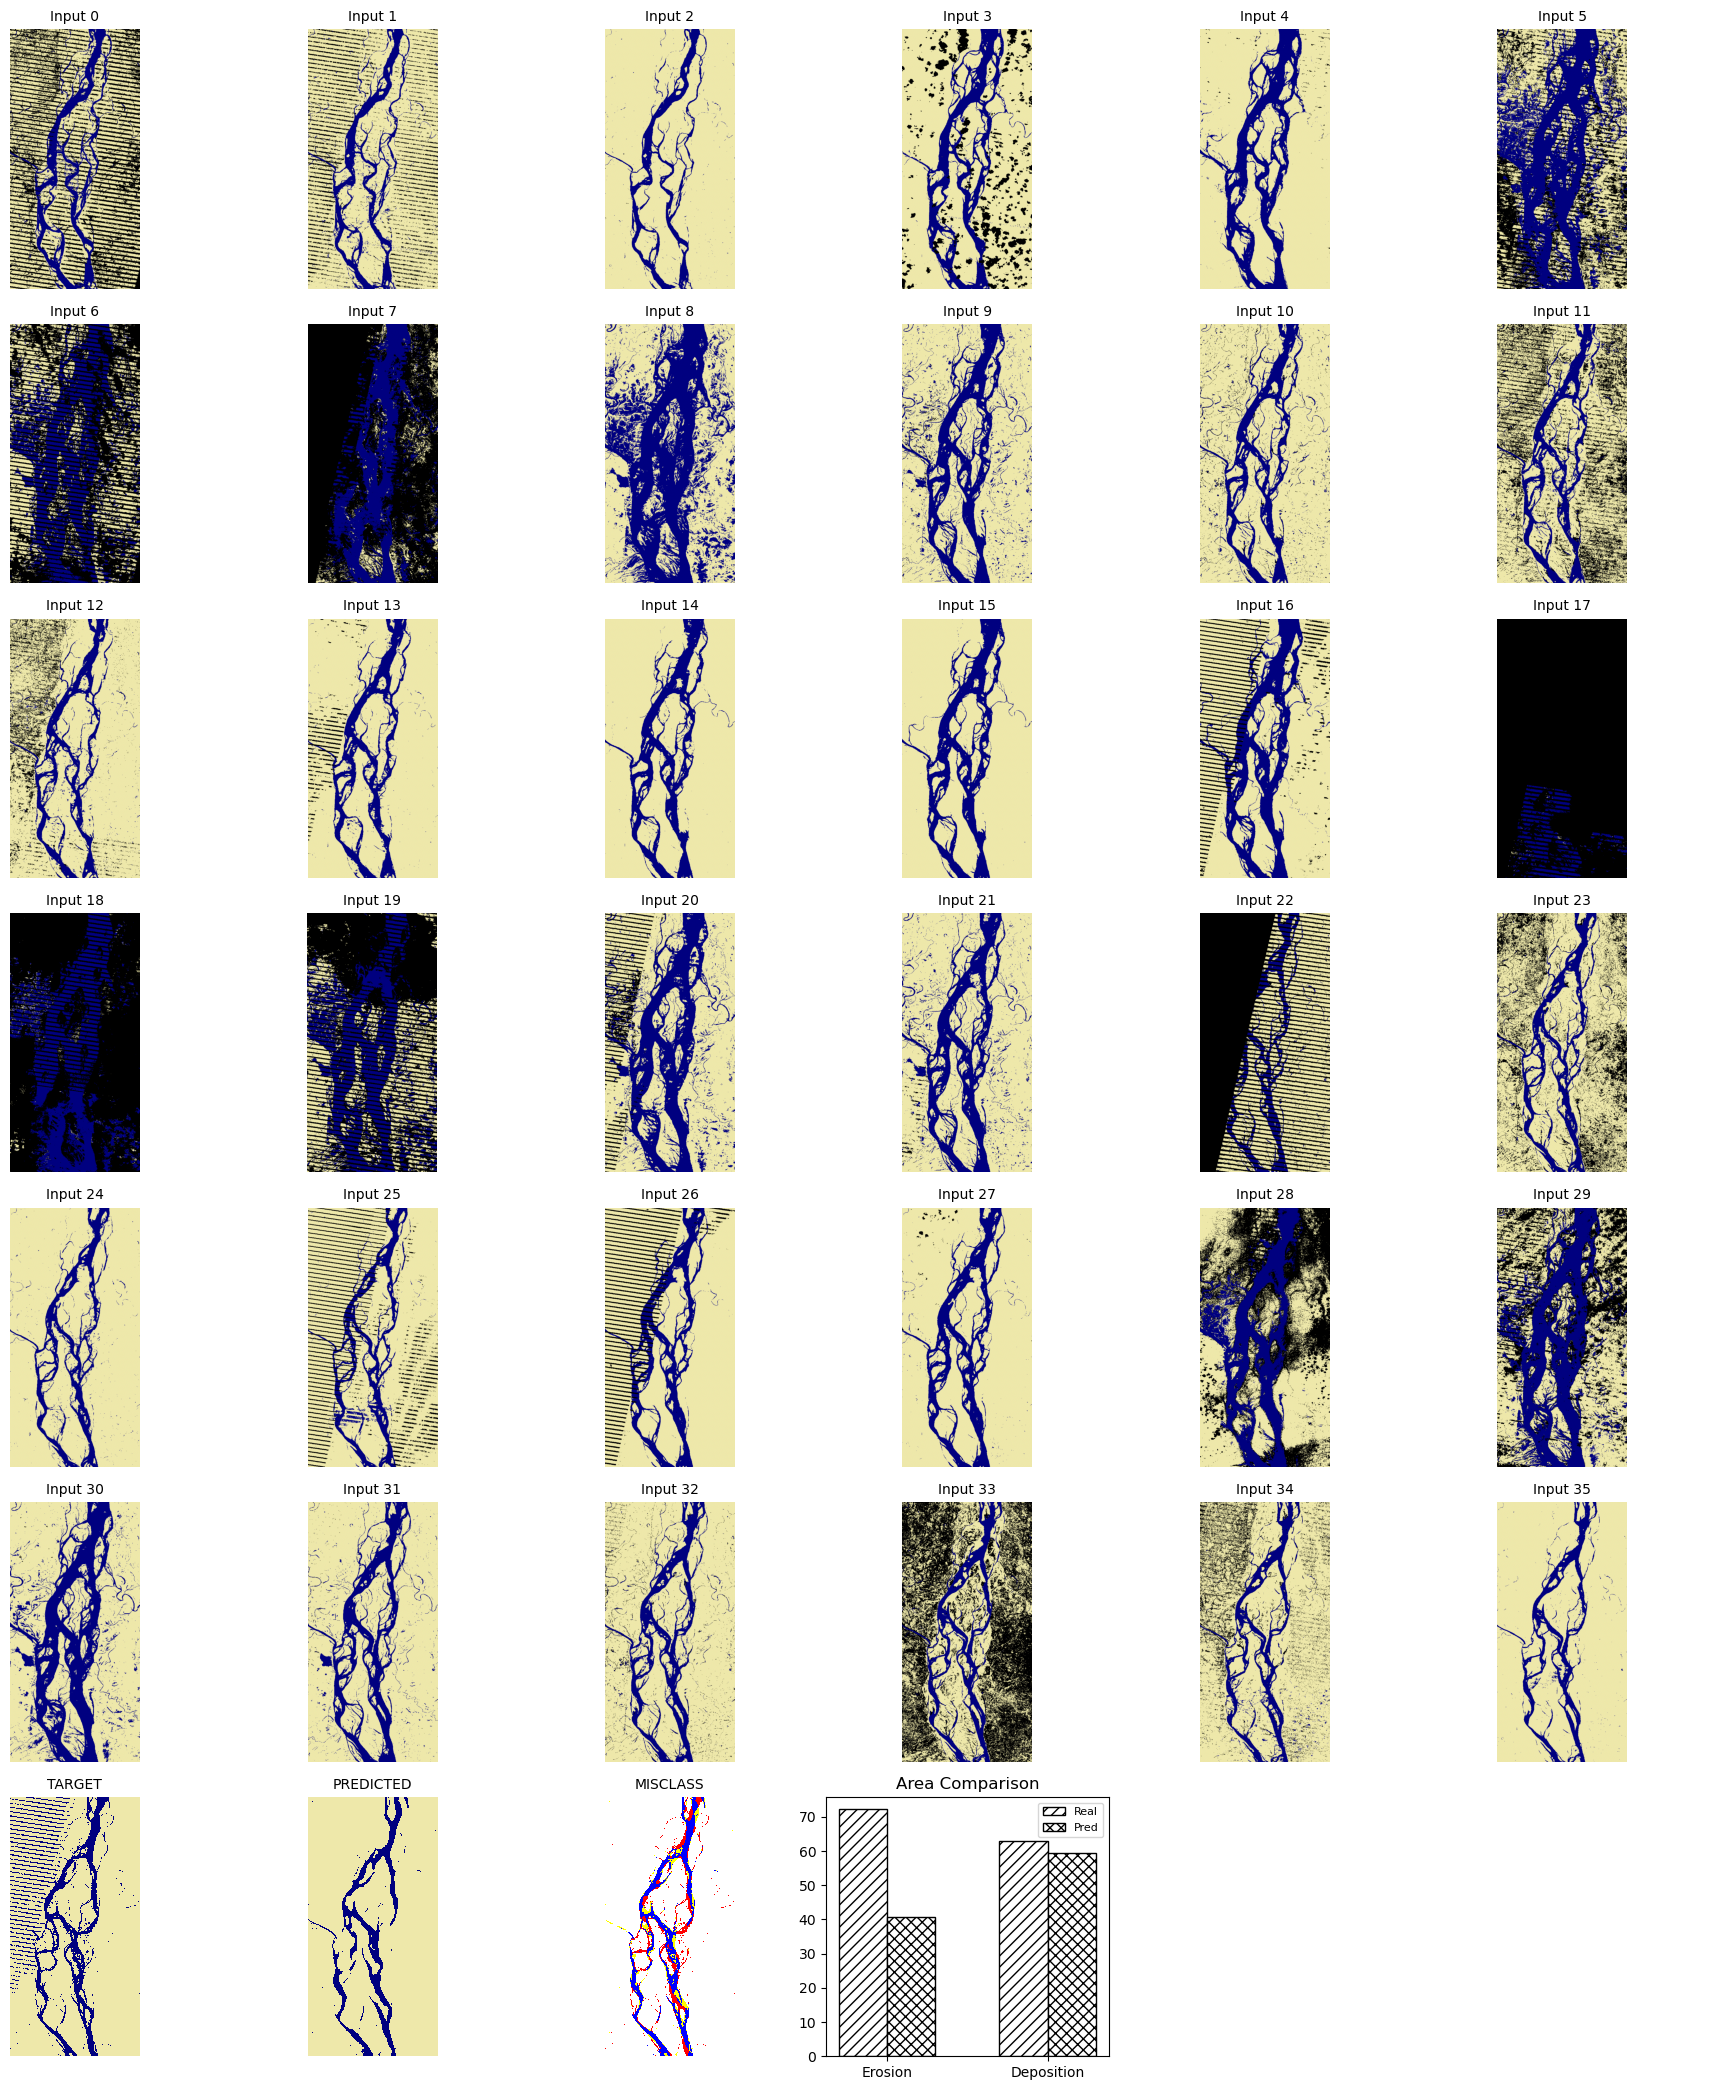

In [31]:
# show_evolution(18, test_set, model_loss)

device = 'cuda:0'
model_loss = model_loss.to(device)

show_all_images(16, test_ds, model_loss, device=device)

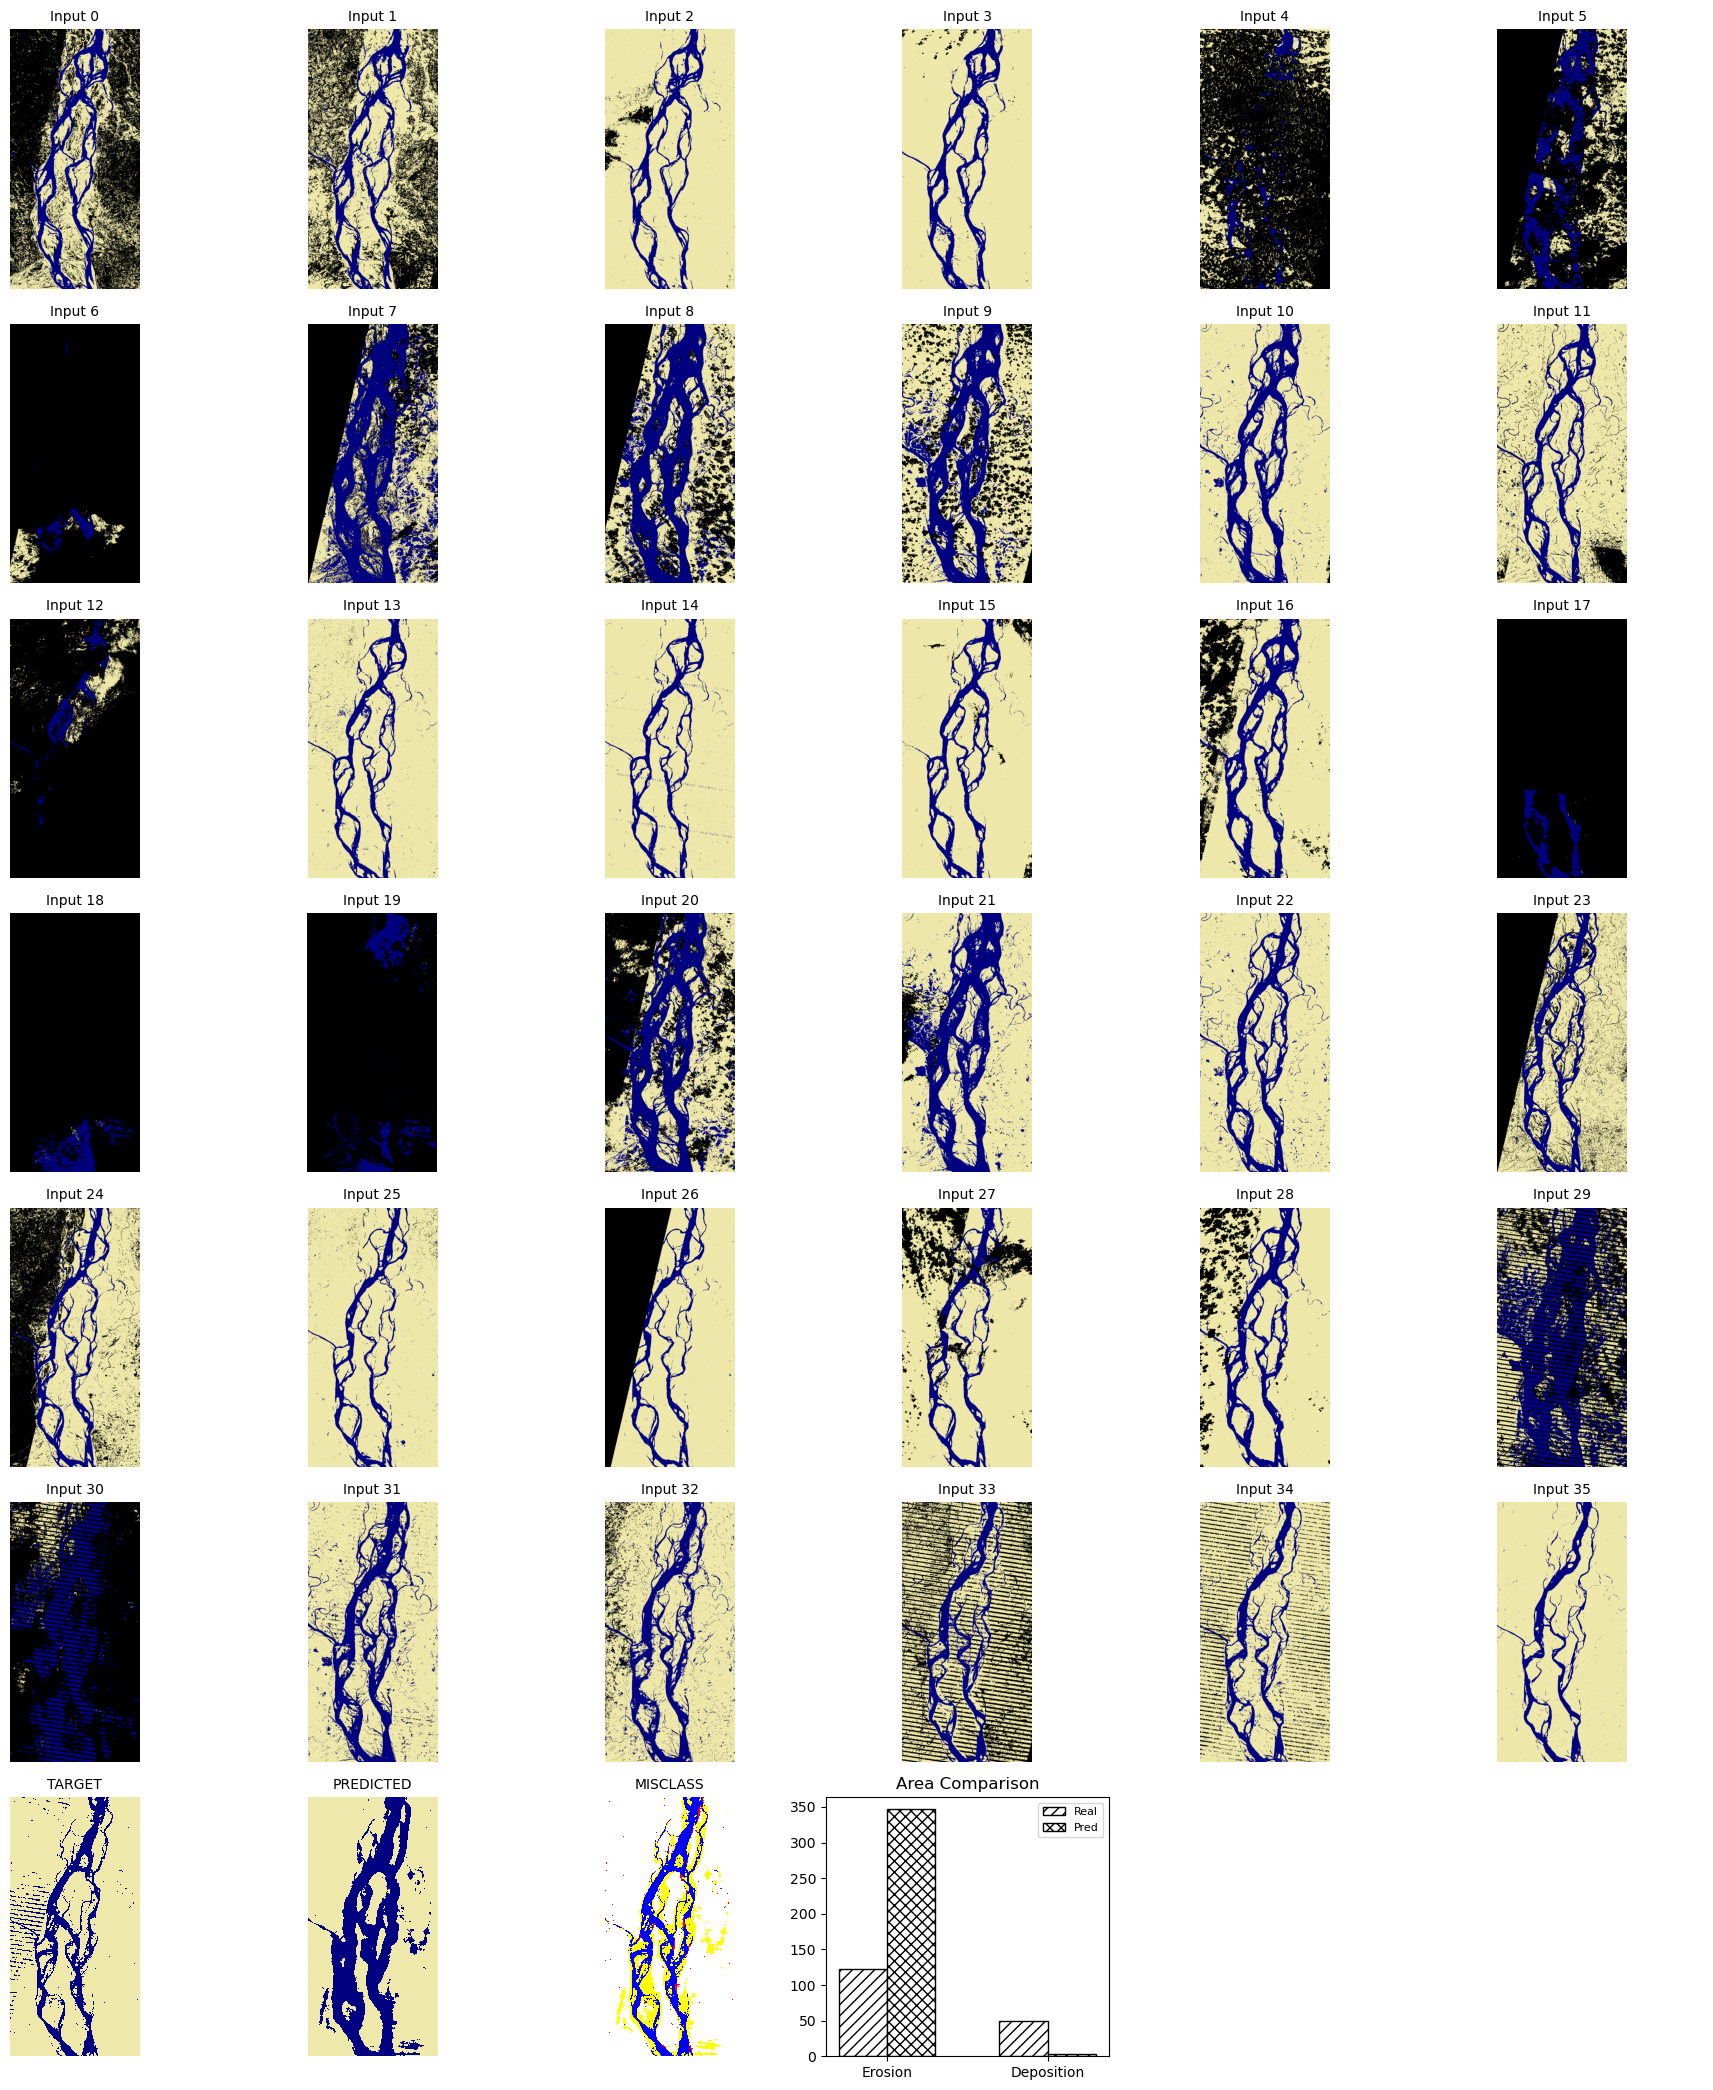

In [32]:
# show_evolution(18, test_set, model_loss)

device = 'cuda:0'
model_loss = model_loss.to(device)

show_all_images(13, test_ds, model_recall, device=device)

In [33]:
# # show_evolution(18, test_set, model_recall)
# show_evolution_nolegend_nn(18, test_set, model_recall, device=device)

In [34]:
# # show_evolution(18, val_set, model_recall)
# show_evolution_nolegend_nn(18, val_set, model_recall, device=device)

In [35]:
# single_roc_curve(model_loss, test_set, sample=18, device=device);

In [36]:
# single_roc_curve(model_recall, test_set, sample=18, device=device);

In [37]:
# get_total_roc_curve(model_loss, test_set, device=device);

In [38]:
# get_total_roc_curve(model_recall, test_set, device=device);

In [39]:
# single_pr_curve(model_loss, test_set, sample=19, device=device)

In [40]:
# # show_evolution(18, test_set, model_loss)
# show_evolution_nolegend_nn(18, test_set, model_loss, device=device)